# Chapter 10: Biological Membranes

(c) 2021 Manuel Razo. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT). 

---

In [26]:
# Our numerical workhorses
import numpy as np
import scipy as sp
from scipy.special import kv as kv # Bessel function
import pandas as pd
import sympy

# Import matplotlib stuff for plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

# Seaborn, useful for graphics
import seaborn as sns

# Import the default plotting style
import plotting_style as pstyle

# Function to import and display images from the Garland website
from IPython.display import Image

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

# Define directories
figdir = '../fig/'

In [27]:
# Set plotting style
pstyle.set_plotting_style()
# Set dpi for inline figures
mpl.rcParams['figure.dpi'] = 110

## 11.10 Two-dimensional treatment of MscL

For this problem we have solved a PDE that defines the height profile of a membrane surrounding a mechanosensitive channel. The solution is written in terms of Hyperbolic Bessel functions and takes the form
$$
u(r) = C_1 K_0(k_1 r) + C_2 K_0(k_1^* r),
$$
where $r$ is the distance from the center of the channel, $K_o(\cdot)$ is the exponentially decaying hyperbolic Bessel function of order zero. The constants $k_1$ and $k_1^*$ are defined as
$$
k_{1}=\sqrt[4]{\frac{K_{t}}{K_{b} \omega_{0}^{2}}}\left(\frac{\sqrt{2}(1+i)}{2}\right),
$$
and
$$
k_{1}^=\sqrt[4]{\frac{K_{t}}{K_{b} \omega_{0}^{2}}}\left(\frac{\sqrt{2}(1-i)}{2}\right),
$$
where $K_b$ is the is the bending rigidity--a parameter characterizing the energy needed to bend the membrane. $K_t$ characterizes the energy cost of having a hydrophobic mismatch between the channel residues and the membrane, and $\omega_0$ is the membrane mid-plane height.

After using the boundary conditions $u(R) = U_o$, meaning that the height of the membrane next to the channel perimeter is given by $U_o$, and $u'(R) = 0$, meaning that the membrane is perfectly aligned with the channel (no weird kinks or anything next to the channel) we find that the two constants $C_1$ and $C_2$ are given by
$$
C_{1}=U_{0} \frac{K_{1}\left(k_{1}^{*} R\right) k_{1}^{*}}{K_{0}\left(k_{1} R\right) K_{1}\left(k_{1}^{*} R\right) k_{1}^{*}-K_{0}\left(k_{1}^{*} R\right) K_{1}\left(k_{1} R\right) k_{1}},
$$
and
$$
C_{2}=-U_{0} \frac{K_{1}\left(k_{1} R\right) k_{1}}{K_{0}\left(k_{1} R\right) K_{1}\left(k_{1}^{*} R\right) k_{1}^{*}-K_{0}\left(k_{1}^{*} R\right) K_{1}\left(k_{1} R\right) k_{1}},
$$
where $K_1(\cdot)$ is the hyperbolic Bessel function of order zero.

Knowing all of this, our task is now to plot the solution $u(r)$ as a function of the distance from the channel. For numerical values we will say that $K_b \approx 20\;k_BT$, $K_t \approx 60\; k_BT/nm^2$, and $\omega_0 \approx 2\; nm$, which gives
$$
\sqrt[4]{\frac{K_{t}}{K_{b} \omega_0^2}} \approx 1 \; nm^{-1}.
$$
Let us first compute the two constants $C_1$ and $C_2$ up to the $U_0$ factor.

In [33]:
# Define channel radius
R = 2  # nm

# Define constants k1 and k1_star
k1 = np.sqrt(2) * (1 - (1j)) / 2
k1_star = np.conjugate(k1)

# Compute C1
C1 = (
    kv(1, k1_star * R)
    * k1_star
    / (
        kv(0, k1 * R) * kv(1, k1_star * R) * k1_star
        - kv(0, k1_star * R) * kv(1, k1 * R) * k1
    )
)

# Compute C2
C2 = -(
    kv(1, k1 * R)
    * k1
    / (
        kv(0, k1 * R) * kv(1, k1_star * R) * k1_star
        - kv(0, k1_star * R) * kv(1, k1 * R) * k1
    )
)

Now we can compute the height profile $u(r)$

In [39]:
# Define range of values for r
r_range = np.linspace(R, 10, 100)  # nm

# Compute height profile
u_r = C1 * kv(0, k1 * r_range) + C2 * kv(0, k1_star * r_range)

And now let's plot the solution!

/Users/mrazomej/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


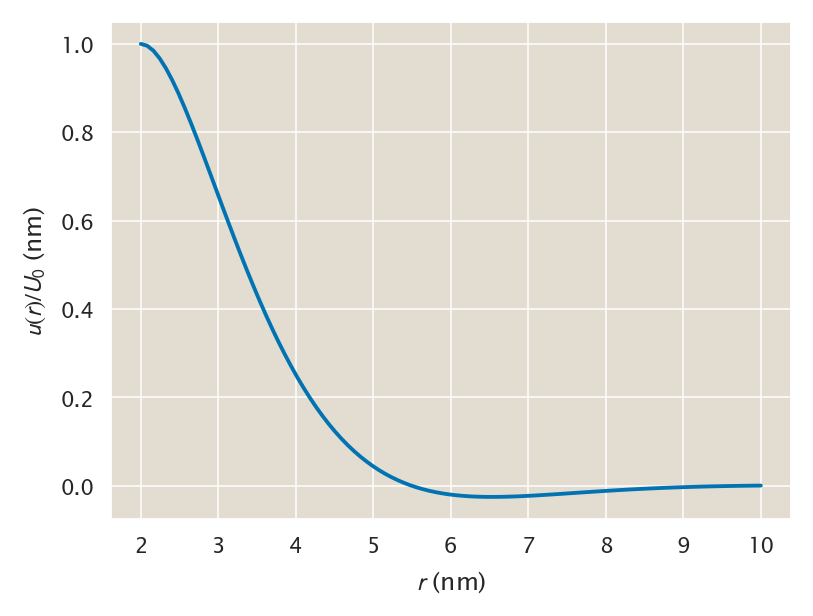

In [46]:
# Plot solution
plt.plot(r_range, u_r)

# Label axis
plt.xlabel(r"$r$ (nm)")
plt.ylabel(r"$u(r) / U_0$ (nm)")

plt.savefig(figdir + "problem_11_10_03.png", bbox_inches="tight", dpi=300)